#### Use breast cancer dataset and apply Gaussian naïve bayes to create a classification model for predicting whether a person suffers from cancer or not. Check the accuracy of your model.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.drop(['Unnamed: 32','id'], axis=1, inplace=True)

In [5]:
X = data.drop('diagnosis', axis=1).copy()
y = data['diagnosis'].copy()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,14.186228,19.212257,92.339528,661.752231,0.096037,0.103647,0.089002,0.048827,0.180473,0.062664,0.406933,1.209196,2.889998,40.927982,0.007078,0.025409,0.032448,0.011981,0.020505,0.003804,16.306315,25.552546,107.505144,885.517585,0.131785,0.249475,0.269983,0.114171,0.288803,0.083535
std,3.584529,4.246314,24.632118,364.505809,0.013813,0.051717,0.079022,0.038242,0.027135,0.007268,0.294128,0.526034,2.145309,49.712587,0.003159,0.018224,0.030598,0.006330,0.008130,0.002693,4.866561,6.045839,33.572388,579.691908,0.023170,0.150723,0.199458,0.064948,0.063343,0.017678
min,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,0.111500,0.360200,0.757000,6.802000,0.002667,0.002252,0.000000,0.000000,0.007882,0.000895,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.170000,75.540000,421.000000,0.085460,0.063300,0.029560,0.020370,0.161500,0.057630,0.236600,0.841300,1.683000,18.150000,0.005043,0.012700,0.014980,0.007895,0.015230,0.002250,13.060000,21.100000,84.460000,517.800000,0.114300,0.141500,0.111700,0.063350,0.247300,0.071130
50%,13.200000,18.830000,85.630000,538.900000,0.094630,0.091590,0.061810,0.033840,0.178800,0.061400,0.319800,1.108000,2.287000,24.790000,0.006428,0.020480,0.026230,0.011120,0.018720,0.003213,14.910000,25.210000,97.660000,683.400000,0.131100,0.208900,0.226000,0.098510,0.280600,0.080090
75%,16.130000,21.570000,106.600000,800.000000,0.104600,0.130600,0.131900,0.075070,0.195700,0.066000,0.469700,1.473000,3.280000,44.410000,0.008200,0.031790,0.042570,0.014710,0.022930,0.004515,18.790000,29.430000,125.900000,1084.000000,0.146400,0.341600,0.387900,0.161400,0.316800,0.091580
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,2.873000,3.647000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.903400,0.275600,0.663800,0.173000


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pre_prop_pipe = Pipeline(steps=[('pca', PCA(n_components=5, random_state=1))])
X_train_prepped = pre_prop_pipe.fit_transform(X_train)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = {'var_smoothing':[1e-13, 1e-11, 1e-9, 1e-7, 1e-5]}
grid_search = GridSearchCV(GaussianNB(), params, cv=kf)
grid_search.fit(X_train_prepped, y_train)

grid_search.best_estimator_

GaussianNB(var_smoothing=1e-13)

In [10]:
clf = GaussianNB(var_smoothing=1e-13)
clf.fit(X_train_prepped, y_train)
y_train_pred = clf.predict(X_train_prepped)

In [11]:
X_test_prepped = pre_prop_pipe.fit_transform(X_test)
y_test_pred = clf.predict(X_test_prepped)
y_test_pos_proba = clf.predict_proba(X_test_prepped)[:,1]

In [12]:
from sklearn.metrics import f1_score

print('F1 Score (train): ', f1_score(y_train, y_train_pred, pos_label='M'))
print('F1 Score (test): ', f1_score(y_test, y_test_pred, pos_label='M'))

F1 Score (train):  0.8686131386861314
F1 Score (test):  0.8387096774193548


In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test.values, y_test_pos_proba, pos_label='M')

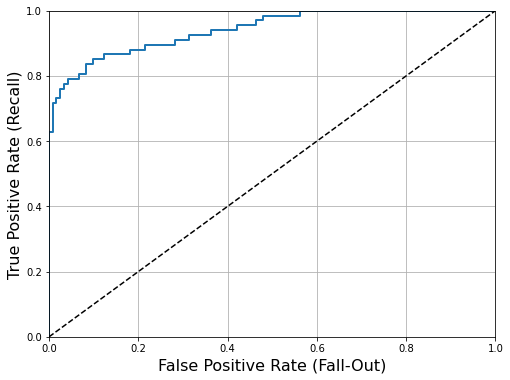

In [14]:
from matplotlib import pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.show()